In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
image = cv2.imread('img/people2.jpg');


In [7]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize=(15,10));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        plt.imshow(img[:,:,::-1]);

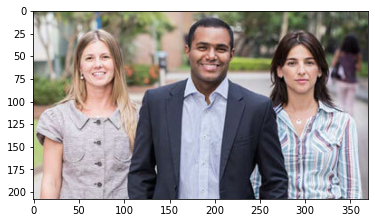

In [5]:
imshow(image, False)

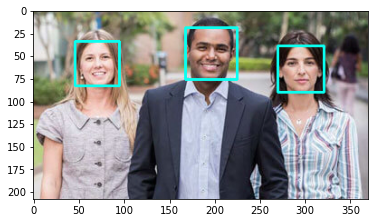

In [40]:
# Given the image above, lets detect faces on the image using haar cascades
# First create a CascadeClassifier using the frontalFace classifier -> Haarcascades/haarcascade_frontalface_default.xml
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Convert the image to grayscale
people2_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Using the classifiers detect all faces on the image
faces = face_classifier.detectMultiScale(people2_gray, scaleFactor=1.2, minNeighbors=3)

people2_copy = image.copy()

# If no faces detected print("No faces found")
if False:
    print("No faces found")

# Otherwise draw a rectangle on each face that has been detected
for (x,y,w,h) in faces:
    # face = people_gray[y:y+h,x:x+w]

    cv2.rectangle(people2_copy, (x,y), (x+w,y+h), (240,255,10), 2)

imshow(people2_copy, False)

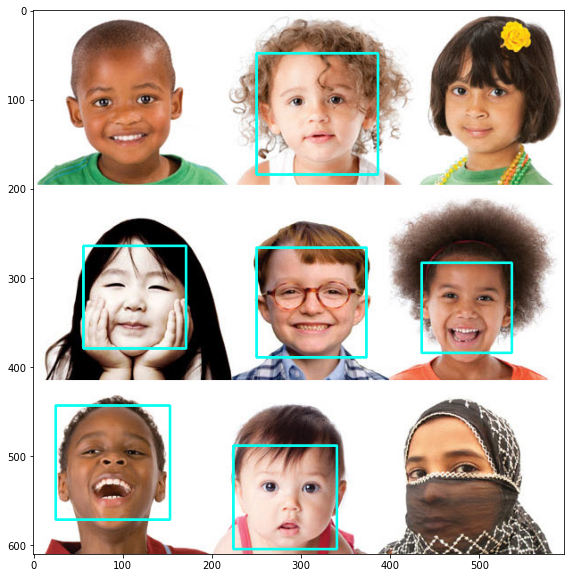

In [73]:
# Repeat the process above with your own images
image2 = cv2.imread('img/people_colors.jpg');
image2 = cv2.imread('img/kids.jpg');

# First create a CascadeClassifier using the frontalFace classifier -> Haarcascades/haarcascade_frontalface_default.xml
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Convert the image to grayscale
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Using the classifiers detect all faces on the image
faces = face_classifier.detectMultiScale(image2_gray, scaleFactor=1.3, minNeighbors=3)

image2_copy = image2.copy()

# If no faces detected print("No faces found")
if False:
    print("No faces found")

# Otherwise draw a rectangle on each face that has been detected
for (x,y,w,h) in faces:
    # face = people_gray[y:y+h,x:x+w]

    cv2.rectangle(image2_copy, (x,y), (x+w,y+h), (240,255,10), 2)

imshow(image2_copy)

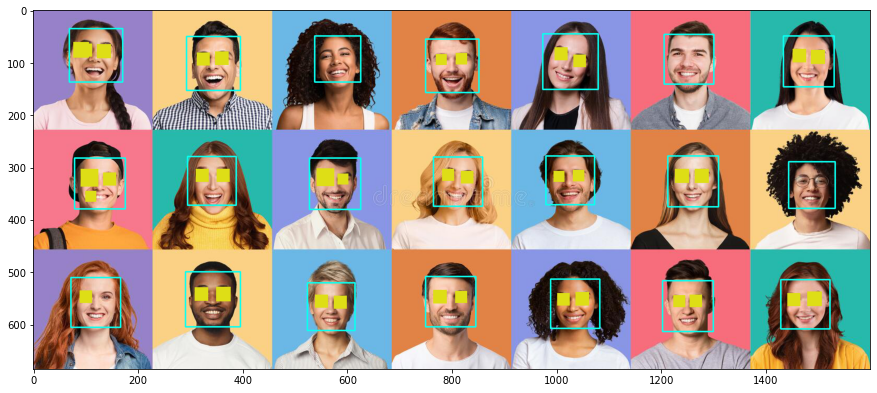

In [82]:
# Now do the same but this time also detect eyes in the faces using -> Haarcascades/haarcascade_eye.xml

image2 = cv2.imread('img/people_colors.jpg');
# image2 = cv2.imread('img/kids.jpg');


# First create a CascadeClassifier using the frontalFace classifier -> Haarcascades/haarcascade_frontalface_default.xml
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eyes_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

# Convert the image to grayscale
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Using the classifiers detect all faces on the image
faces = face_classifier.detectMultiScale(image2_gray, scaleFactor=1.35, minNeighbors=4)
# faces_gray_1 = cv2.cvtColor(faces, cv2.COLOR_BGR2GRAY) 


image2_copy = image2.copy()

# If no faces detected print("No faces found")
if False:
    print("No faces found")

# Otherwise draw a rectangle on each face that has been detected
for (x,y,w,h) in faces:
    face = image2_gray[y:y+h,x:x+w]
    cv2.rectangle(image2_copy, (x,y), (x+w,y+h), (240,255,10), 2)
    eyes = eyes_classifier.detectMultiScale(face, scaleFactor=1.25, minNeighbors=2)
    # cv2.putText(image2_copy, (x,y), (x+w,y+h, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0,), 2)
    
    if len(eyes) >= 1:
        for (ex,ey,ew,eh) in eyes:
            # sum x and y to coord  
            rect = cv2.rectangle(image2_copy, (ex + x, ey + y), (ex + ew + x, ey + eh + y), (22, 222, 222, 0.8), -1)
            out = cv2.addWeighted(image2_copy, 0.1, rect, 0.75, 1)


imshow(image2_copy)

In [ ]:
# Encapsulate all the logic to detect faces and eyes in a function and apply it to live video using you webcam
